# imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/rabito/Desktop/Rabito Docs/Documents/Career Foundry/Achievement 6/Project'

In [5]:
df = pd.read_csv(os.path.join(path,'Homelessness Data','Prepared Data', 'Service.csv'),index_col= 0)

# data cleaning

In [7]:
df.shape

(3717, 9)

In [8]:
df.head()

,Report Date,Borough,Community District,boro_cd,Case Type,Cases,Individuals,cluster,clusters
0,06/30/2022,Bronx,1,201,All Case Types,692,1455,purple,1
1,06/30/2022,Bronx,2,202,All Case Types,370,786,dark purple,2
2,06/30/2022,Bronx,3,203,All Case Types,644,1440,purple,1
3,06/30/2022,Bronx,4,204,All Case Types,737,1624,purple,1
4,06/30/2022,Bronx,5,205,All Case Types,683,1392,purple,1


In [9]:
df.describe()

,Community District,boro_cd,Cases,Individuals,clusters
count,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,7.423729,280.305085,356.421577,702.588647,0.755448
std,4.484864,117.774035,289.233333,630.772926,0.849666
min,1.000000,101.000000,9.000000,14.000000,0.000000
25%,3.000000,203.000000,122.000000,218.000000,0.000000
50%,7.000000,306.000000,276.000000,473.000000,0.000000
75%,11.000000,403.000000,537.000000,1033.000000,2.000000
max,18.000000,503.000000,1324.000000,2821.000000,2.000000


In [10]:
df.isnull().sum()

Report Date           0
Borough               0
Community District    0
boro_cd               0
Case Type             0
Cases                 0
Individuals           0
cluster               0
clusters              0
dtype: int64

In [11]:
dups = df.duplicated()
dups.shape # No dups

(3717,)

/var/folders/gc/00zck94n7xg4v6fr7ggfw0km0000gp/T/ipykernel_42377/3700017279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Individuals'], bins=25) # shows extreme values that may need to be removed
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Individuals', ylabel='Density'>

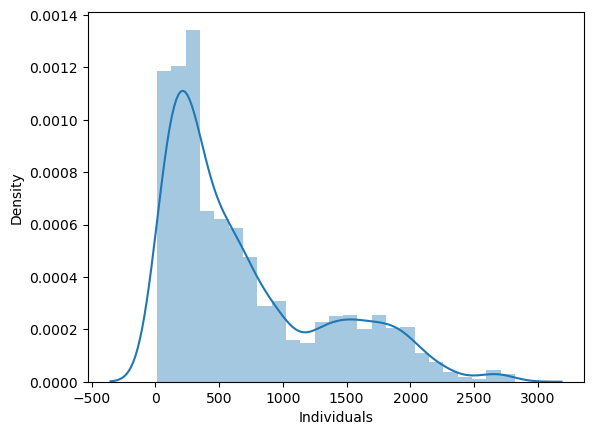

In [12]:
sns.distplot(df['Individuals'], bins=25) # shows extreme values that may need to be removed


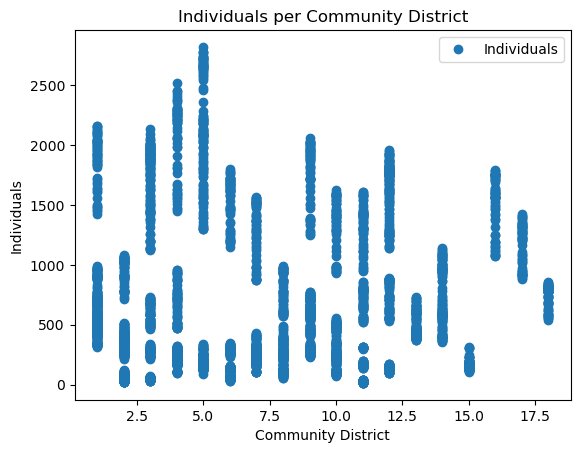

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Community District', y='Individuals',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Individuals er Community District')  
plt.xlabel('Community District')  
plt.ylabel('Individuals')  
plt.show()

In [14]:
df.groupby(['Borough'])['Cases'].sum()

Borough
Bronx            465540
Brooklyn         405787
Manhattan        218864
Queens           206734
Staten Island     27894
Name: Cases, dtype: int64

In [15]:
df.groupby(['Borough'])['Individuals'].sum()

Borough
Bronx            1026164
Brooklyn          775544
Manhattan         383463
Queens            367893
Staten Island      58458
Name: Individuals, dtype: int64

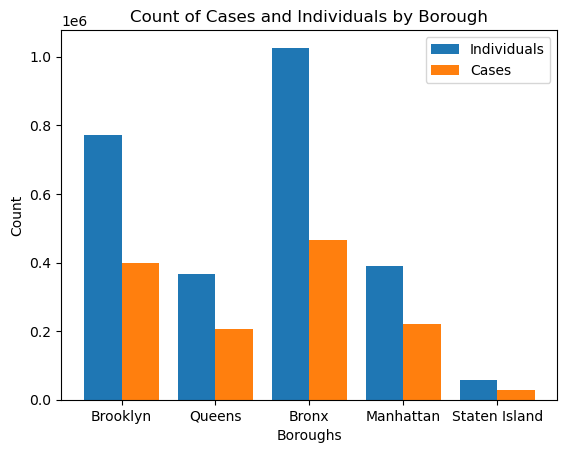

In [16]:
X = ['Brooklyn','Queens','Bronx','Manhattan','Staten Island'] 
Yind = [773144,367893,1026164,388463,58458] # sum of individuals by borough calculated above
Zcas = [399687,206734,465540,220864,27894] # sum of cases by borough calculated above
  
X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, Yind, 0.4, label = 'Individuals'),
plt.bar(X_axis + 0.2, Zcas, 0.4, label = 'Cases') 

  
plt.xticks(X_axis, X) 
plt.xlabel("Boroughs") 
plt.ylabel("Count") 
plt.title("Count of Cases and Individuals by Borough") 
plt.legend()
plt.show()

In [17]:
X = df['Individuals'].values.reshape(-1,1)
y = df['Cases'].values.reshape(-1,1)

In [18]:
X

array([[1455],
       [ 786],
       [1440],
       ...,
       [ 896],
       [ 116],
       [  68]])

In [19]:
y

array([[692],
       [370],
       [644],
       ...,
       [386],
       [ 57],
       [ 37]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
regression = LinearRegression()

In [22]:
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
y_predicted = regression.predict(X_test)

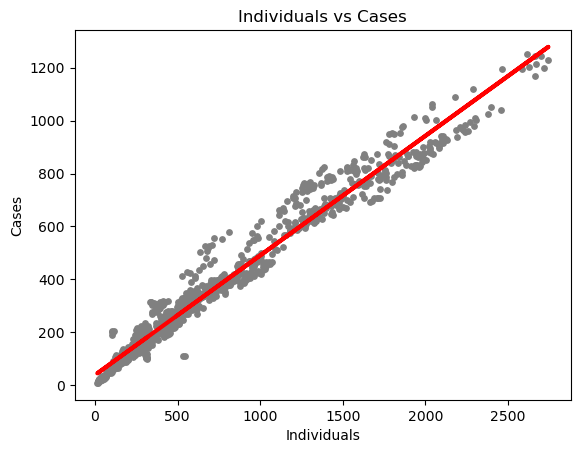

In [24]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Individuals vs Cases')
plot_test.xlabel('Individuals')
plot_test.ylabel('Cases')
plot_test.show()

In [25]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.45174053]]
Mean squared error:  2414.773717598123
R2 score:  0.9704790926282081


#While the mean squared error is high, this is likely due to a few outliers. The regression line is a good indicator as predicted by the r-squared value.

In [28]:
y_predicted

array([[263.05391111],
       [407.61088196],
       [ 97.71687569],
       ...,
       [201.16545796],
       [287.44789994],
       [180.3853934 ]])

In [29]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,285,263.053911
1,410,407.610882
2,113,97.716876
3,355,360.629866
4,781,818.694768
5,380,406.707401
6,79,107.203427
7,181,164.574475
8,317,237.304701
9,291,314.552332


In [30]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.45174053]]
Mean squared error:  2383.969590713138
R2 score:  0.9717575598917204


#The results are slightly on the training set than the model. The mean squared value is lower and the r-squared value is higher.

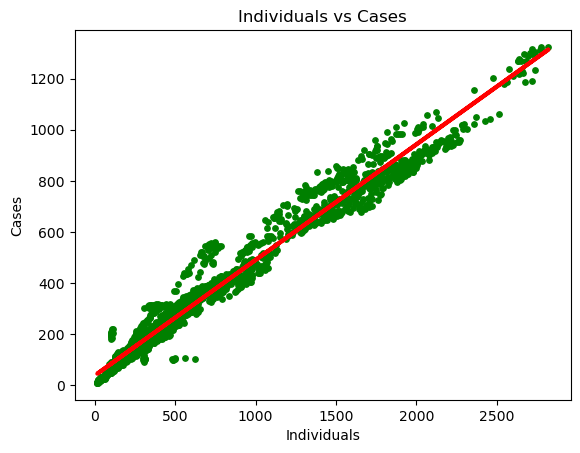

In [34]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Individuals vs Cases')
plot_test.xlabel('Individuals')
plot_test.ylabel('Cases')
plot_test.show()